# ANALYZE COMPANY'S SALES

In [1]:
# Load all the needed packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import scipy.stats as sci
%matplotlib inline
sns.set_palette("colorblind")
sns.set_context("talk")
sns.set(style = "dark", rc={'figure.figsize':(11.7,8.27)})

In [2]:
# Import the cleaned dataset
sales_clean = pd.read_csv("clean_datasets/sales_clean.csv", 
                          dtype={"category":"category", "gender":"category"},
                          parse_dates=["date"])
sales_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336816 entries, 0 to 336815
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     336816 non-null  int64         
 1   date        336816 non-null  datetime64[ns]
 2   session_id  336816 non-null  int64         
 3   client_id   336816 non-null  int64         
 4   category    336816 non-null  category      
 5   price       336816 non-null  float64       
 6   gender      336816 non-null  category      
 7   age         336816 non-null  int64         
dtypes: category(2), datetime64[ns](1), float64(1), int64(4)
memory usage: 16.1 MB


## ANALYZE THE DATA  

Now that all the datasets are cleaned we can make some analysis. 


**What is the average price of the sales?**

In [3]:
sales_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336816 entries, 0 to 336815
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     336816 non-null  int64         
 1   date        336816 non-null  datetime64[ns]
 2   session_id  336816 non-null  int64         
 3   client_id   336816 non-null  int64         
 4   category    336816 non-null  category      
 5   price       336816 non-null  float64       
 6   gender      336816 non-null  category      
 7   age         336816 non-null  int64         
dtypes: category(2), datetime64[ns](1), float64(1), int64(4)
memory usage: 16.1 MB


We have an average price of **17.22** but with a standard deviation of **17.85** which means that there are too much variability between the prices, there are probably outliers. Let's check for the IQR.  

In [4]:
# IQR of the price
def iqr(column) -> float:
    """return the iqr of a given column"""
    return column.quantile(.75) - column.quantile(.25)
# IQR of the price
iqr(sales_clean.price)

10.379999999999999

We have an IQR of around **10**, the variability is high. Let's make a plot.

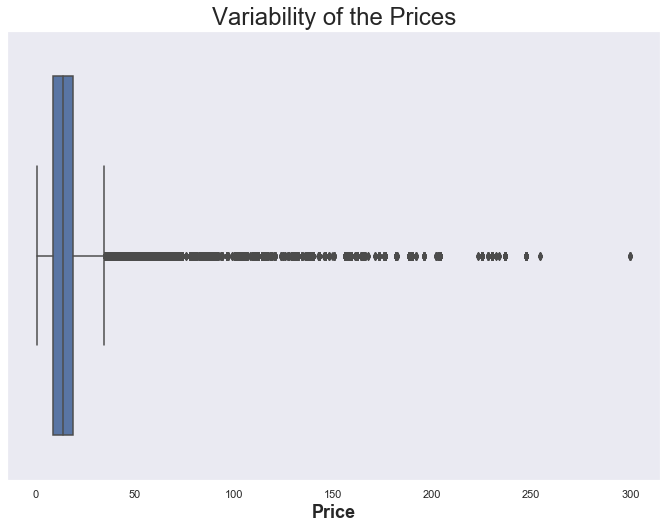

In [5]:
# Boxplot to see the variability
sns.boxplot("price", data = sales_clean)
plt.title("Variability of the Prices", fontsize = 24)
plt.xlabel("Price", fontsize = 18, fontweight = "bold");

As we can see there are many outliers. Let's try to find them all. 

In [6]:
# Find all the positive outliers, Q3 + 1.5IQR
outliers = sales_clean.price.quantile(0.75)+1.5*iqr(sales_clean.price)
sales_clean.price[sales_clean.price > outliers].sort_values()

34429      34.77
155477     34.77
262595     34.77
162605     34.77
62627      34.77
           ...  
334751    300.00
50216     300.00
115097    300.00
281102    300.00
303214    300.00
Name: price, Length: 20423, dtype: float64

All the price between **34.77** to **300** are outliers. 

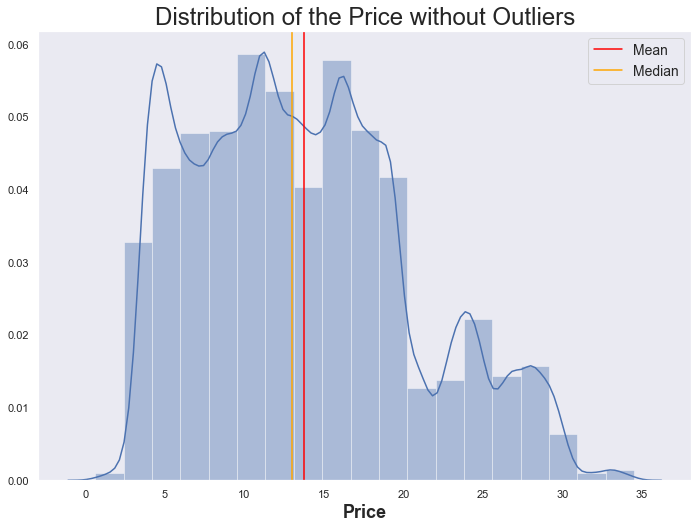

In [7]:
# Distribution of the non outliers values
sales_clean_no_outliers = sales_clean[sales_clean.price < outliers] # Compute the dataframe of the non outliers
bins = int(round(1 + np.log2(sales_clean_no_outliers.shape[0]))) # Optimal number of bins
sns.distplot(sales_clean_no_outliers.price, bins = bins) # Distribution plot of the non outliers values
plt.axvline(sales_clean_no_outliers.price.mean(), color = "red") # Plot vertical line of the mean
plt.axvline(sales_clean_no_outliers.price.median(), color = "orange") # Plot the vertical line of the median
plt.legend(["Mean", "Median"], fontsize = 14)
plt.title("Distribution of the Price without Outliers", fontsize = 24)
plt.xlabel("Price", fontsize = 18, fontweight = "bold");

In [8]:
sales_clean_no_outliers.price.agg([np.mean, np.median])

mean      13.721993
median    12.990000
Name: price, dtype: float64

If we remove all the outliers the mean and median are almost the same and are around $13. 

In [9]:
# check the proportion of outliers in the dataframe
sales_clean_outliers = sales_clean.price[sales_clean.price > outliers]
prop_outliers = len(sales_clean_outliers) / len(sales_clean) * 100
prop_outliers

6.063548049973873

The outliers represent about **6%** of the number of sales. Let see what it represent as value

In [10]:
# total sales for the outliers
outliers_total_sales = sales_clean_outliers.sum() / sales_clean.price.sum() * 100
outliers_total_sales

25.120122475412238

Even if the outliers represent just **6%** of the sales, they represent **25%** of the total purchases amount.

In [11]:
# mean, median and mode of the price in the dataframe
print("mean : ",sales_clean.price.mean())
print("median : ",sales_clean.price.median())
print("mode : ",sales_clean.price.mode()[0])

mean :  17.21417471267639
median :  13.9
mode :  15.99


We confirm here that most of the sales are between **0 and 16**, with highest sales at **13.9**

**Which are the categories with more sales?**

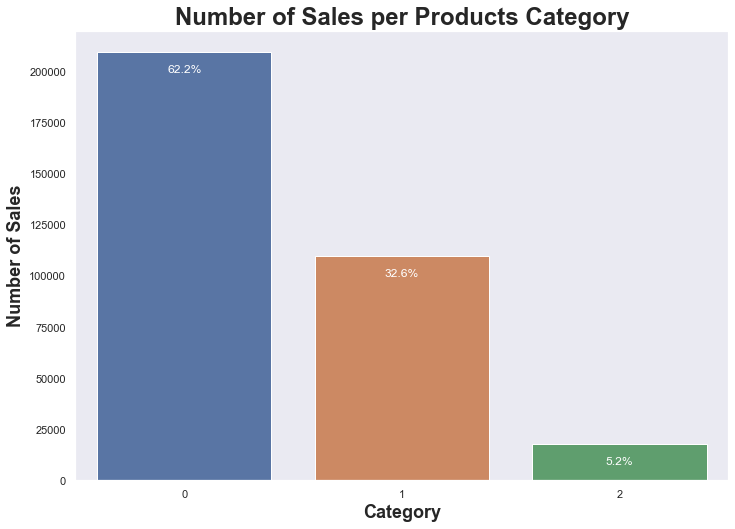

In [12]:
# Barplot of the categories
sns.countplot(data = sales_clean, x = "category")
plt.title("Number of Sales per Products Category", fontsize = 24, fontweight = "bold")
plt.xlabel(xlabel = "Category", fontsize = 18, fontweight = "bold")
plt.ylabel(ylabel = "Number of Sales", fontsize = 18, fontweight = "bold")
# Add some annotations
number_points = sales_clean.shape[0]        # number of points in the dataset
category_counts = sales_clean.category.value_counts() # all Values of the categories
locs, labels = plt.xticks()   # Current tick locations and labels
# Loop through each pair of locations and labels  
for loc, label in zip(locs, labels):
    # Text property for the label to get the current count
    count = category_counts[label.get_text()]
    percentage = '{:0.1f}%'.format(100*count/number_points) # Percentage of each category
    # Put the annotations inside the bar on the top
    plt.text(x = loc, y = count-10000, s = percentage, ha = 'center', color = 'white')

**62%** of the sales are in category 0, **33%** in category 1 and just **5.2%** in category 2. 

**What is the Average price in each category?**

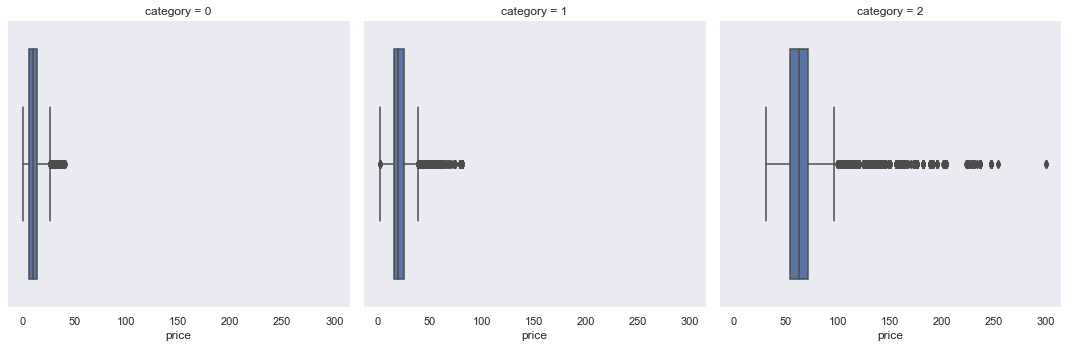

In [13]:
# Considering all the dataframe
sns.catplot(x = "price", data = sales_clean, kind = "box", col = "category");

In [14]:
for i in range(3):
    print("Mean Category " + str(i) + ": ", sales_clean.price[sales_clean.category == str(i)].mean())
    print("Median Category " + str(i) + ": ", sales_clean.price[sales_clean.category == str(i)].median())
    print("Mode Category " + str(i) + ": ", sales_clean.price[sales_clean.category == str(i)].mode()[0])
    print("Standard Deviation Category " + str(i) + ":", sales_clean.price[sales_clean.category == str(i)].std(),"\n")    

Mean Category 0:  10.648427425323296
Median Category 0:  9.99
Mode Category 0:  4.99
Standard Deviation Category 0: 4.929345339563638 

Mean Category 1:  20.4801058003428
Median Category 1:  19.08
Mode Category 1:  15.99
Standard Deviation Category 1: 7.568956079961025 

Mean Category 2:  75.17494929352519
Median Category 2:  62.83
Mode Category 2:  68.99
Standard Deviation Category 2: 39.0799988187327 



The average price in category `0 is $10, in category 1 it is $19 and in category 2 it is $62`. 
There are many outliers in all categories. we take as average the median.

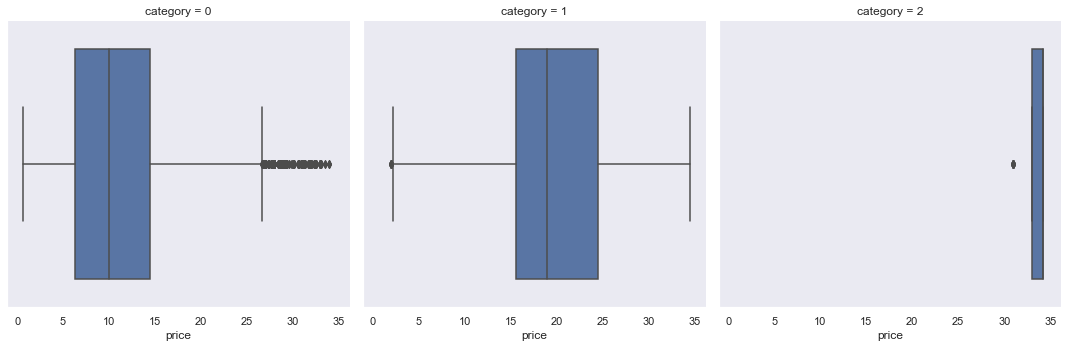

In [15]:
# Average sales in each category removing outliers
sns.catplot(x = "price", data = sales_clean_no_outliers, kind = "box", col = "category");

In [17]:
# measures of center df without outliers
for i in range(3):
    print("Mean Category " + str(i) + ": ", sales_clean_no_outliers.price[sales_clean_no_outliers.category == str(i)].mean())
    print("Median Category " + str(i) + ": ", sales_clean_no_outliers.price[sales_clean_no_outliers.category == str(i)].median())
    print("Mode Category " + str(i) + ": ", sales_clean_no_outliers.price[sales_clean_no_outliers.category == str(i)].mode()[0])
    print("Standard Deviation Category " + str(i) + ":", sales_clean_no_outliers.price[sales_clean_no_outliers.category == str(i)].std(),"\n")

Mean Category 0:  10.63737482155133
Median Category 0:  9.99
Mode Category 0:  4.99
Standard Deviation Category 0: 4.9006383705794745 

Mean Category 1:  19.751837108982308
Median Category 1:  18.99
Mode Category 1:  15.99
Standard Deviation Category 1: 5.939520677816348 

Mean Category 2:  33.504698795180715
Median Category 2:  34.23
Mode Category 2:  34.23
Standard Deviation Category 2: 1.181694047883549 



It seems that all the outiers values are from product of category 2. Product of category 2 are the most expensives.

**Distribution of Age**

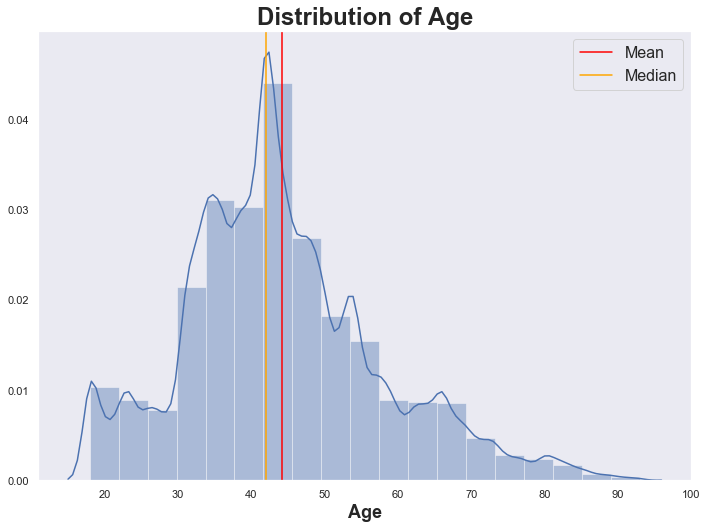

In [18]:
# Plot age distribution
bins_sales_clean = int(round(1 + np.log2(sales_clean.shape[0])))# Optimal number of bins
sns.distplot(sales_clean.age, bins = bins_sales_clean) # Distribution plot
plt.xlabel("Age", fontsize = 18, fontweight = "bold")
plt.title("Distribution of Age", fontsize = 24, fontweight = "bold")
plt.axvline(sales_clean.age.mean(), color = "red")
plt.axvline(sales_clean.age.median(), color = "orange")
plt.legend(["Mean", "Median"], fontsize = 16);

Most of the sales come from people aged between 30 and 55 with a peak at 42 years old.

**Sales by Gender**

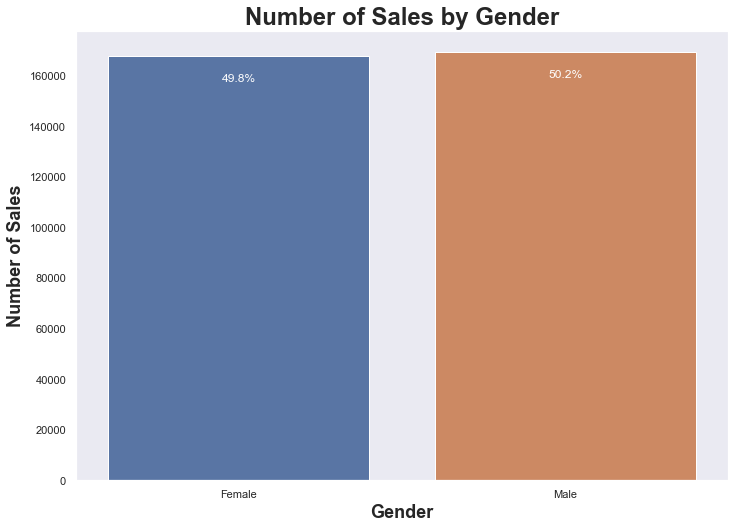

In [19]:
# Barplot of the categories
sns.countplot(data = sales_clean, x = "gender")
plt.title("Number of Sales by Gender", fontsize = 24, fontweight = "bold")
plt.xlabel(xlabel = "Gender", fontsize = 18, fontweight = "bold")
plt.ylabel(ylabel = "Number of Sales", fontsize = 18, fontweight = "bold")
# Add some annotations
number_points = sales_clean.shape[0]        # number of points in the dataset
category_counts = sales_clean.gender.value_counts() # all Values of each category
locs, labels = plt.xticks()   # Current tick locations and labels
# Loop through each pair of locations and labels  
for loc, label in zip(locs, labels):
    # Text property for the label to get the current count
    count = category_counts[label.get_text()]
    percentage = '{:0.1f}%'.format(100*count/number_points) # Percentage of each category
    # Put the annotations inside the bar on the top
    plt.text(x = loc, y = count-10000, s = percentage, ha = 'center', color = 'white')

The number of sales is almost the same for each gender.

**Sales over time**

Check all the date availaible.

In [20]:
# Check the years 
sales_clean.date.dt.year.unique()

array([2021, 2022], dtype=int64)

In [21]:
# Check the last date of 2022
sales_clean.date.max()

Timestamp('2022-02-28 23:59:58.040472')

We have data for 2021 and 2022. For 2022 we have just January and February.

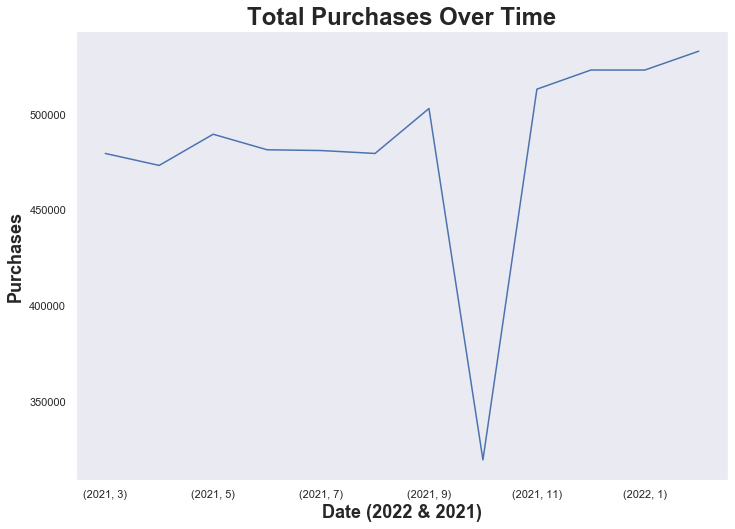

In [22]:
# Time series of the price each month just for 2021
sales_over_time = sales_clean.copy()
sales_over_time["year"] = sales_over_time.date.dt.year # Create year variable
sales_over_time["month"] = sales_over_time.date.dt.month # Create month variable
sales_over_time.groupby(["year", "month"]).price.sum().plot()# Plot sales over time
plt.title("Total Purchases Over Time", fontsize = 24, fontweight = "bold")
plt.xlabel("Date (2022 & 2021)", fontsize = 18, fontweight = "bold")
plt.ylabel("Purchases", fontsize = 18, fontweight = "bold");

In 2021 December is the month with the most sales, while October is the worse. Overall february is the month with the most sales.
There is a high drop in october, let's go deep to see what is really happening.

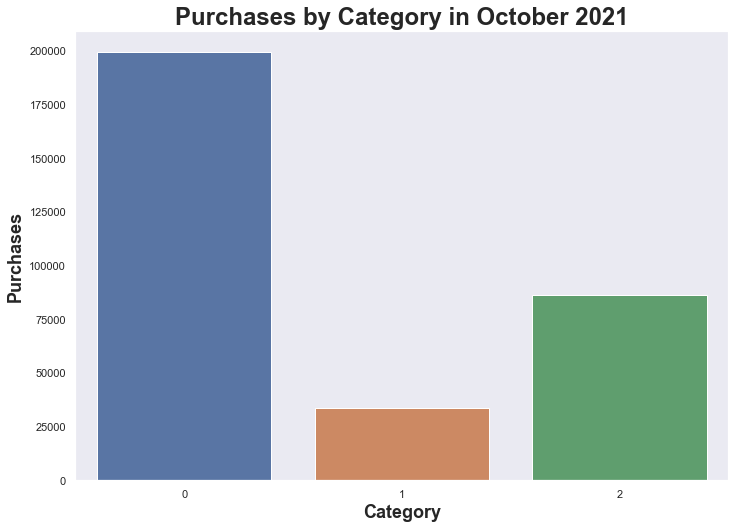

In [23]:
# Compute the dataframe with just october
sales_clean_oct = sales_clean[sales_clean.date.dt.month == 10]
# Group by category 
g_oct = sales_clean_oct.groupby("category").price.sum().reset_index()
sns.barplot("category", "price", data = g_oct)
plt.xlabel("Category", fontsize = 18, fontweight = "bold")
plt.ylabel("Purchases", fontsize = 18, fontweight = "bold")
plt.title("Purchases by Category in October 2021", fontsize = 24, fontweight = "bold");

The Sales in October are very low for the category 1, let's go deep by checking each day of that month.

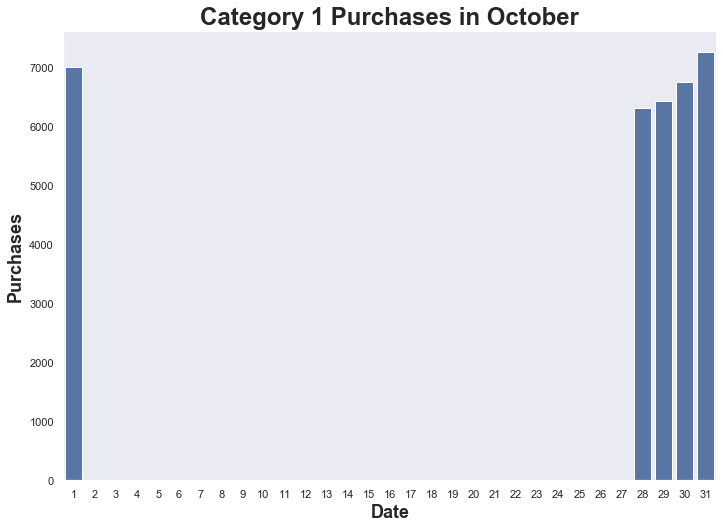

In [24]:
# Dataframe of all the days of october, we group by category and days
sales_oct = sales_clean_oct.groupby(["category", sales_clean_oct.date.dt.day]).sum().reset_index()
# Filter just for category 1
sales_oct_1 = sales_oct[sales_oct.category == "1"]
sns.barplot("date", "price",data = sales_oct_1, color = "b")
plt.xlabel("Date", fontsize = 18, fontweight = "bold")
plt.ylabel("Purchases", fontsize = 18, fontweight = "bold")
plt.title("Category 1 Purchases in October", fontsize = 24, fontweight = "bold");

We can clearly see that from the 2th to the 27th there were no sales. Maybe there was a lack of product that period, this is to investigate.

**What is the day of the week with the most sales over time?**

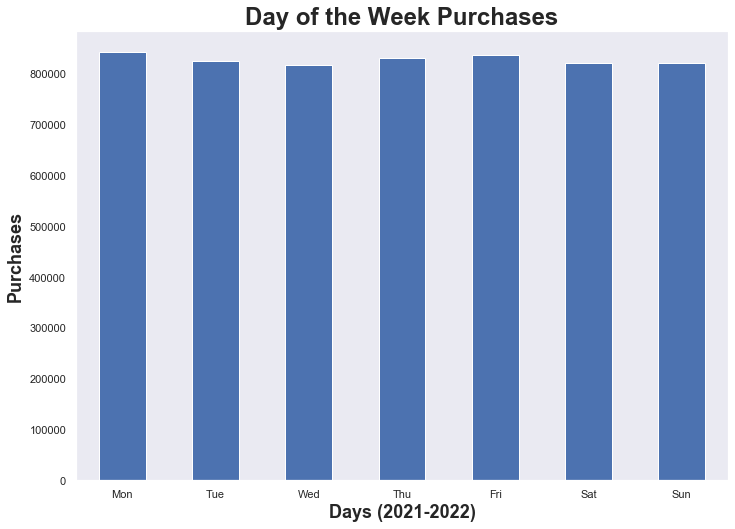

In [25]:
# Group by day and plot
sales_clean.groupby(sales_clean.date.dt.dayofweek).price.sum().plot(kind = "bar")
plt.xlabel("Days (2021-2022)", fontsize = 18, fontweight = "bold")
plt.ylabel("Purchases", fontsize = 18, fontweight = "bold")
plt.title("Day of the Week Purchases", fontsize = 24, fontweight = "bold")
plt.xticks([0,1,2,3,4,5,6],["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"], rotation = 0);

All the days of the week have almost the same amount of purchases, so there is not a better day for sales.

**Concentration of sales - Lorenz Curve**

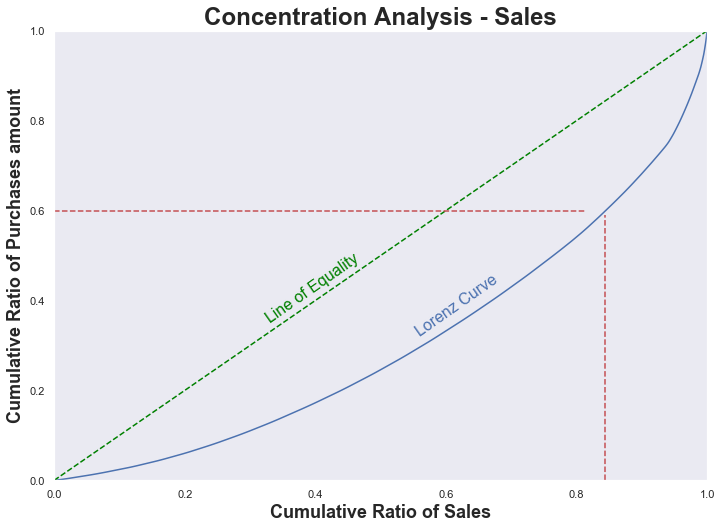

In [26]:
# Plot the lorenz curve
n = len(sales_clean.price) #size of the sample
lorenz = np.cumsum(np.sort(sales_clean.price) / sales_clean.price.sum()) #result will be an array
lorenz = np.append([0], lorenz) #values of the y axis on the curve, the curve will begin at 0

# plt.axes().axis("equal") #x and y axis will have the same length
xaxis = np.linspace(-1/n, 1+1/n, n+1) #values of the x axis on the curve
plt.plot(xaxis, lorenz, drawstyle = "steps-post") # Plot lorenz curve
plt.plot(xaxis, xaxis, linestyle="--", color = "green") # Plot the 1st bissector
plt.xlim(0,1)
plt.ylim(0,1)
plt.ylabel("Cumulative Ratio of Purchases amount", fontsize = 18, fontweight = "bold")
plt.xlabel("Cumulative Ratio of Sales", fontsize = 18, fontweight = "bold")
plt.axvline(0.843, ymax = 0.59, linestyle = "--", color = "r") # Plot vertical and horizontal line
plt.axhline(0.6, xmax = 0.813, linestyle = "--", color = "r")  #
plt.title("Concentration Analysis - Sales", fontsize = 24, fontweight = "bold")
plt.text(s = "Line of Equality", y = 0.35, x = 0.32, rotation = 35, fontsize = 16, color = "green")
plt.text(s = "Lorenz Curve", y = 0.32, x = 0.55, rotation = 35, fontsize = 16, color = "b");

**Gini Coefficient**

In [27]:
# compute gini coefficient
AUC = (lorenz.sum() - lorenz[-1]/2 - lorenz[0]/2)/n # Area under the curve
S = 0.5 - AUC # Area between the curve and the 1st bissector
gini = round(2*S,1)*100
gini

40.0

We have a gini coefficient of around 40%, which means there is inequality.
Bottom 84% of the sales just give 60% of the total purchases amount.

### Correlations

**Correlation between Gender and Category**

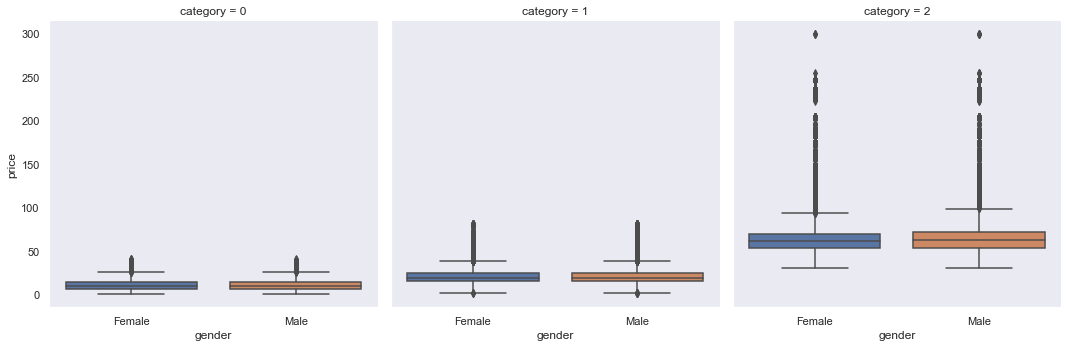

In [28]:
# boxplot, gender and categories of products purchased
sns.catplot(x = "gender", y = "price", col = "category", kind = "box" , data = sales_clean);

We can see that in each category gender are almost simmetrical, this means that there is no difference of purchase between gender in each category.

In [29]:
# Contigency table
gender_category_table = pd.crosstab(index = sales_clean.category, columns = sales_clean.gender)
gender_category_table

gender,Female,Male
category,,
0,103846,105683
1,55469,54266
2,8260,9292


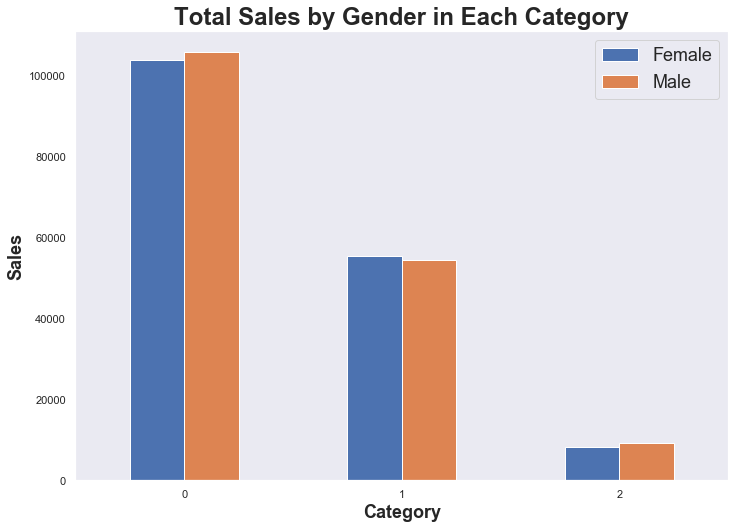

In [30]:
gender_category_table.plot(kind="bar", rot= 0)
plt.title("Total Sales by Gender in Each Category", fontsize = 24, fontweight = "bold")
plt.xlabel("Category", fontsize = 18, fontweight = "bold")
plt.ylabel("Sales", fontsize = 18, fontweight = "bold")
plt.legend(fontsize = 18, loc = "upper right");

Our hypothesis.
>   H0 : Gender and Category are independant  
    H1: Gender and Category are dependant

In [31]:
stat, p, dof, expected = sci.chi2_contingency(gender_category_table)
if p > 0.01:
    print("Gender and Category are probably independent")
else:
    print("Gender and Category are probably dependent")
# def chi_squared(table)-> str:
    

Gender and Category are probably dependent


There are more sales in category 0 and very few in category 2, even if category sales 2 has products with higher prices.   
In category **0** *Male* make more purchases than *Female*.  
In category **1** *Female* make more purchases than *Male*.  
In category **2** *Male* make more purchases than *Female*. 

**Correlation between age and total amount of purchases**

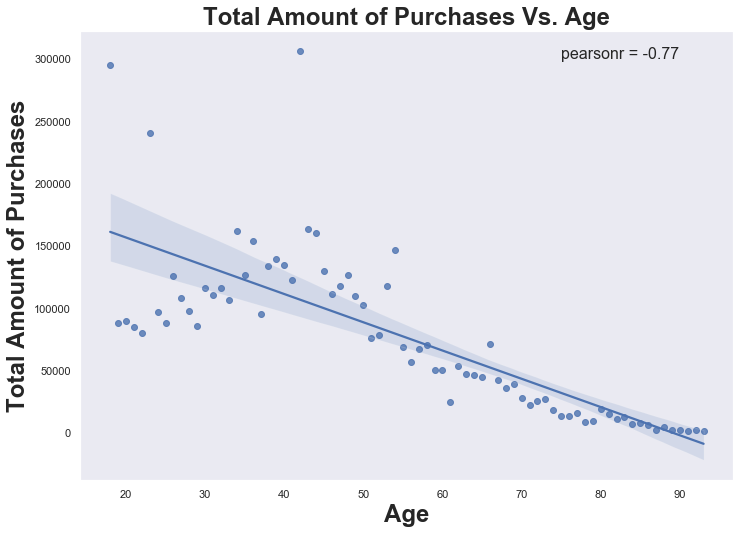

In [32]:
# Create a dataframe with age and the total amount purchases
corr_age_price = sales_clean.groupby("age").sum().reset_index()
# Compute the pearsonr 
r_age_price = sci.pearsonr(corr_age_price.price, corr_age_price.age)[0]
# Plot using regplot
sns.regplot(x = "age", y = "price", data = corr_age_price)
plt.xlabel("Age", fontsize = 24, fontweight = "bold")
plt.ylabel("Total Amount of Purchases", fontsize = 24, fontweight = "bold")
plt.title("Total Amount of Purchases Vs. Age", fontsize = 24, fontweight = "bold")
plt.text(s = "pearsonr = {:.2f}".format(r_age_price), y = 300000, x = 75, fontsize = 16);


There is a strong negative correlation between the age and the amount of purchases, as the age increases the amount of purchases decreases.  
Young people buy more than old people. 

**Correlation between age and the purchase frequency(Number of purchases per month)**

In [33]:
# Compute a group_age variable
def group_age(age:int) -> str:
    """return the group age of each age"""
    if age >= 18 and age < 35:
        return "18-34"
    elif age >= 35 and age < 61:
        return "35-60"
    elif age >= 61:
        return "61+"
# Create the group_age variable and turn it into category
sales_clean["group_age"] = sales_clean.age.apply(group_age).astype("category") 

**Correlation between age and the categories of purchases products**

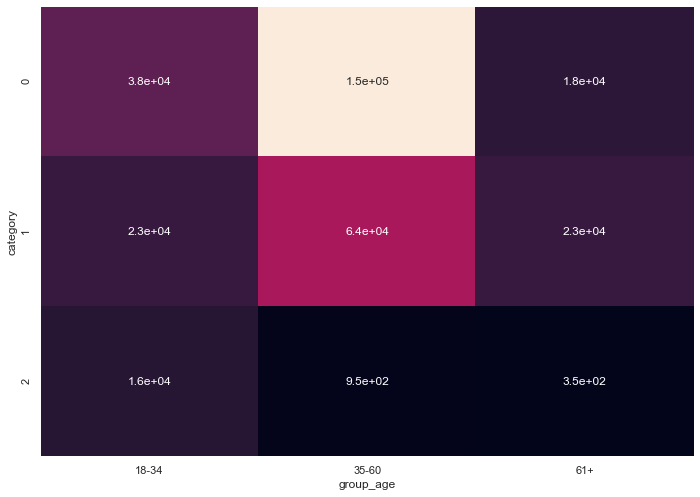

In [34]:
group_age_category_table = pd.crosstab(index = sales_clean.category, columns = sales_clean.group_age)
sns.heatmap(group_age_category_table, annot = True, cbar = False);

Our hypothesis.
>   `H0 : Age and Category are independant`  
    `H1: Age and Category are dependant`

In [35]:
stat, p, dof, expected = sci.chi2_contingency(group_age_category_table)
if p > 0.01:
    print("age and Category are probably independent") # We fail to reject the null hypothesis
else:
    print("age and Category are probably dependent") # We reject the null hypothesis

age and Category are probably dependent


For all ages there are more sales in category 0 and less in category 2.  
People aged between 35-60 make more purchases in category 0 and 1 compared to other age group.

**Correlation between age and the average basket size (in number of items)**

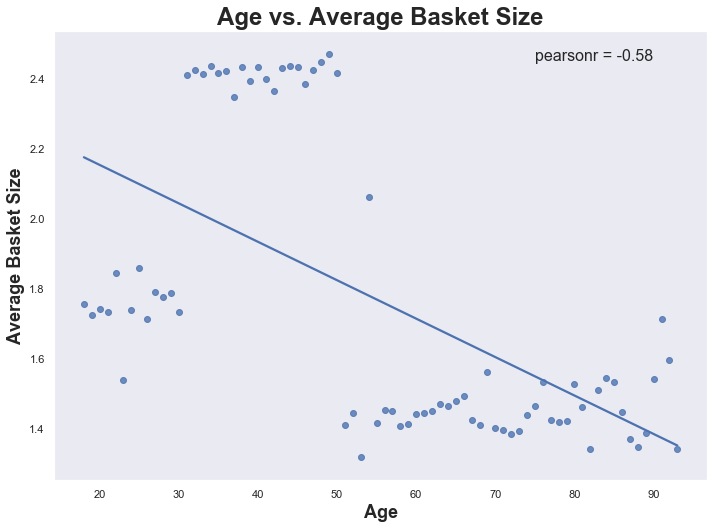

In [36]:
# compute the average basket size
age_average_basket = sales_clean.groupby(["age", "session_id"]).count().reset_index().groupby("age")["id_prod"].mean().reset_index()
sns.regplot("age", "id_prod", data = age_average_basket, ci = False)
plt.xlabel("Age", fontsize = 18, fontweight = "bold")
plt.ylabel("Average Basket Size", fontsize = 18, fontweight = "bold")
plt.title("Age vs. Average Basket Size", fontsize = 24, fontweight = "bold")
r_age_average_basket = sci.pearsonr(age_average_basket.age, age_average_basket.id_prod)[0]
plt.text(s = "pearsonr = {:.2f}".format(r_age_average_basket), x = 75, y = 2.45, fontsize = 16);

There is a correlation between age and the average basket size.  
Young people (< 50 years old) have an average basket size higher than older people. As we could expect we have a pick
between people aged 30 to 50 years old which is the range where we have the highest sales.